I wanted to continue exploring the dataset for opportunities to create new features or transform existing ones. Feature engineering can significantly impact model performance, to see if we can increase the previous accuracy of 70.50%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'/Users/briangor/Downloads/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['height']=df['height']*0.01

In [4]:
df['bmi'] = (df['weight'] / (df['height'] ** 2)).astype('int')

In [5]:
df['age'] = (df['age'] / 365).round().astype('int')

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,1.68,76.0,120,80,1,1,1,0,1,0,26
69996,99995,62,1,1.58,126.0,140,90,2,2,0,0,1,1,50
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,31
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27


In [7]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new feature
df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [8]:
# Define age groups
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to create a new feature
df['age_group'] = df['age'].apply(categorize_age)


In [9]:
# Define blood pressure categories
def categorize_bp(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif ap_hi >= 140 or ap_lo >= 90:
        return 'Hypertension'
    else:
        return 'High-Normal'

# Apply the function to create a new feature
df['bp_category'] = df.apply(lambda row: categorize_bp(row['ap_hi'], row['ap_lo']), axis=1)


In [10]:
# Create an interaction feature between age and cholesterol
#df['age_cholesterol_interaction'] = df['age'] * df['cholesterol']

In [11]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'bmi_category', 'age_group', 'bp_category'],
      dtype='object')

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,age_group,bp_category
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,Normal,Middle-aged,High-Normal
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,Obese,Middle-aged,Hypertension
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23,Normal,Middle-aged,High-Normal
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,Overweight,Middle-aged,Hypertension
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23,Normal,Middle-aged,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,1.68,76.0,120,80,1,1,1,0,1,0,26,Overweight,Middle-aged,High-Normal
69996,99995,62,1,1.58,126.0,140,90,2,2,0,0,1,1,50,Obese,Senior,Hypertension
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,31,Obese,Middle-aged,Hypertension
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,Overweight,Senior,High-Normal


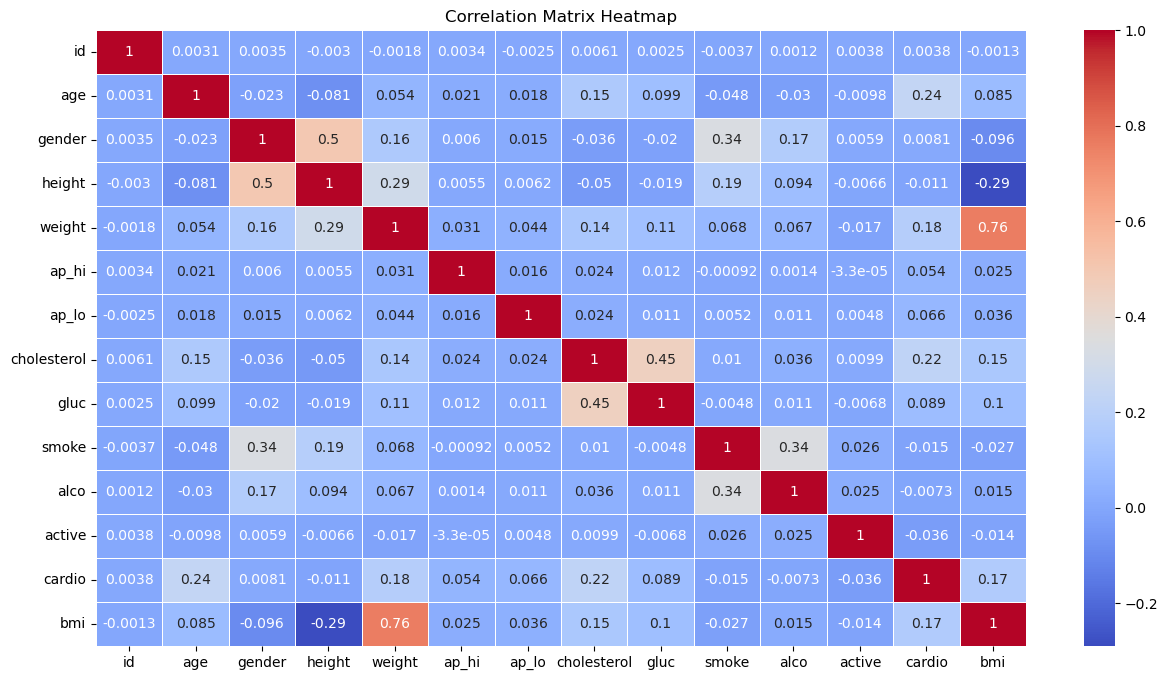

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


<h2> Model Building </h2>

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
df=pd.get_dummies(df)

In [21]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_Middle-aged,age_group_Senior,age_group_Young,bp_category_High-Normal,bp_category_Hypertension,bp_category_Normal
0,50,2,1.68,62.0,110,80,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,55,1,1.56,85.0,140,90,3,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,52,1,1.65,64.0,130,70,3,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,48,2,1.69,82.0,150,100,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,48,1,1.56,56.0,100,60,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,1.68,76.0,120,80,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
69996,62,1,1.58,126.0,140,90,2,2,0,0,...,0,1,0,0,0,1,0,0,1,0
69997,52,2,1.83,105.0,180,90,3,1,0,1,...,0,1,0,0,1,0,0,0,1,0
69998,61,1,1.63,72.0,135,80,1,2,0,0,...,0,0,1,0,0,1,0,1,0,0


In [22]:
# Define the features (X) and the target variable (y)
X = df.drop('cardio', axis=1)  # Features (all columns except 'cardio')
y = df['cardio']  # Target variable ('cardio')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [25]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Model Evaluation
y_pred = model.predict(X_test)

print('The models performance is as follows: ')
print(classification_report(y_test, y_pred))
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('------------------------------------------------------')
print("Model's Accuracy:", accuracy_score(y_test, y_pred))

The models performance is as follows: 
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6988
           1       0.75      0.67      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

-----------------------------------------------------
[[5445 1543]
 [2315 4697]]
------------------------------------------------------
Model's Accuracy: 0.7244285714285714


In [27]:
# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  # Use StratifiedKFold for classification tasks

# Create your machine learning model (e.g., classifier) here
model = LogisticRegression()

# Define the number of folds for cross-validation
n_folds = 5  # You can adjust this number as needed

# Perform cross-validation
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Calculate the mean accuracy and its standard deviation
mean_accuracy = cross_val_results.mean()
std_accuracy = cross_val_results.std()

print(f"Cross-Validation Accuracy: {mean_accuracy:.4f} (± {std_accuracy:.4f})")


Cross-Validation Accuracy: 0.7234 (± 0.0037)


In [28]:
# Hyper-Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Define your machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Define a dictionary of hyperparameters and their possible values to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values for the regularization parameter 'C'
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Example solvers
}

# Create a GridSearchCV object with your model, parameter grid, and cross-validation settings
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Best Hyperparameters: {'C': 1, 'solver': 'sag'}
Test Accuracy with Best Model: 0.7262857142857143


I have performed hyperparameter tuning for my Logistic Regression model, and the best hyperparameters found were 'C': 1 and 'solver': 'sag' with a test accuracy of approximately 72.63%. This indicates that the model is performing reasonably well with the selected hyperparameters.

Now that we have the best hyperparameters and a tuned Logistic Regression model, you can proceed to use this model for making predictions or further analysis.

In [31]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

print('The models performance is as follows: ')
print(classification_report(y_test, y_pred))
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('------------------------------------------------------')
print("Model's Accuracy:", accuracy_score(y_test, y_pred))

The models performance is as follows: 
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6988
           1       0.75      0.67      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

-----------------------------------------------------
[[5445 1543]
 [2315 4697]]
------------------------------------------------------
Model's Accuracy: 0.7244285714285714


The model's performance evaluation provides valuable insights into its predictive ability. Here's what the key metrics indicate:

- **Precision**: The precision for class 0 (predicted as 0) is 0.70, which means that out of all the instances the model predicted as class 0, 70% of them were correct. The precision for class 1 is 0.75, indicating that 75% of the instances predicted as class 1 were correct.

- **Recall**: The recall for class 0 is 0.78, suggesting that the model correctly identified 78% of the actual class 0 instances. For class 1, the recall is 0.67, indicating that 67% of the actual class 1 instances were correctly identified by the model.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. The weighted average F1-score for the model is around 0.72, which is a balanced measure of precision and recall.

- **Confusion Matrix**: The confusion matrix shows the model's predictions versus the actual values. It indicates that there are 5445 true negatives (class 0 correctly predicted as 0), 4697 true positives (class 1 correctly predicted as 1), 1543 false positives (class 0 incorrectly predicted as 1), and 2315 false negatives (class 1 incorrectly predicted as 0).

- **Accuracy**: The model's overall accuracy is approximately 0.7244, indicating that it correctly predicts the target variable for around 72.44% of the instances in the test set.

Overall, a model with an accuracy of 0.7244 suggests that it's making reasonably accurate predictions, but there may be room for further improvement, depending on our project's objectives.

<h3> Baseline Accuracy:</h3> It's important to establish a baseline accuracy, which is the accuracy a simple or naive model would achieve. Your model should significantly outperform this baseline to be considered effective.

In [32]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

So, in your dataset, the majority class baseline accuracy is approximately 50.03%. This means that a simple model that always predicts the majority class (0 in this case) would achieve an accuracy of about 50.03% without learning any patterns in the data.